# UniReps & NeuroAI Hackathon: <br> Aligning Neural Representations

### How do we compare computational models with the brain?
- Understanding how the brain works often requires comparing **different models** with **experimental data**.  
- These comparisons can be made at multiple levels:
  - **Behavioral** patterns  
  - **Neural activity**  
- To make such comparisons, we need a way to relate the **abstract numbers from models** to **experimental observations**.  
- The **goal of this hackathon** is to explore the considerations required for making these comparisons correctly, such that we can get insights into the **inner workings of the brain** through modeling  

### How do researchers compare models with the brain?

| **Method** | **What It Tests** | **How It’s Done** | **Key References** |
|------------|-------------------|-------------------|--------------------|
| **Tuning Curve Comparisons** | Similarity of single-neuron selectivity | Fit and compare tuning functions (e.g., orientation, direction) | [Hubel & Wiesel (1962)](https://pubmed.ncbi.nlm.nih.gov/14449617/) ; [Carandini et al. (2005)](https://www.jneurosci.org/content/25/46/10577) |
| **Encoding Models** | Predictive power of model features for neural activity | Regression from model features → neural responses | [Naselaris et al. (2011)](https://pubmed.ncbi.nlm.nih.gov/20691790/) ; [Yamins et al. (2014)](https://www.pnas.org/doi/10.1073/pnas.1403112111) ; [BrainScore (2018)](https://www.biorxiv.org/content/10.1101/407007v1) |
| **Decoding / Behavioral Alignment** | Similar readout performance from population activity | Classify/decipher stimuli or task variables from activity | [Hung et al. (2005)](https://pubmed.ncbi.nlm.nih.gov/16272124/) ; [Cichy et al. (2016)](https://www.nature.com/articles/srep27755) |
| **Representational Similarity Analysis (RSA)** | Geometry of stimulus representations | Compare representational dissimilarity matrices (RDMs) | [Kriegeskorte et al. (2008)](https://www.frontiersin.org/articles/10.3389/neuro.06.004.2008/full) ; [Khaligh-Razavi & Kriegeskorte (2014)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003915) |
| **Dimensionality & Population Structure** | Low-dimensional manifold structure | PCA, factor analysis, demixed PCA, manifold alignment | [Churchland et al. (2012)](https://www.nature.com/articles/nature11129) ; [Stringer et al. (2019)](https://www.nature.com/articles/s41586-019-1346-5) ; [Pandarinath et al. (2018)](https://www.jneurosci.org/content/38/44/9390.abstract) |
| **Dynamics Matching** | Temporal evolution & computational motifs | Dynamical systems analysis, fixed points, attractors | [Sussillo & Barak (2013)](https://pubmed.ncbi.nlm.nih.gov/23272922/) ; [Mante et al. (2013)](https://www.nature.com/articles/nature12742) |
| **Information-Theoretic Comparisons** | Coding efficiency & information content | Mutual information, Fisher information, entropy | [Quiroga & Panzeri (2009)](https://www.nature.com/articles/nrn2578) ; [Borst & Theunissen (1999)](https://www.nature.com/articles/nn1199_947) |
| **Task-Performance Equivalence** | Same behavior under same task | Compare psychometric functions, error distributions | [Yamins & DiCarlo (2016)](https://www.nature.com/articles/nn.4244) ; [Richards et al. (2019)](https://www.nature.com/articles/s41593-019-0520-2) |
| **Causal Interventions / Perturbations** | Functional role of units | Virtual lesions, noise injection, compare to optogenetics | [Sajid et al. (2021)](https://pmc.ncbi.nlm.nih.gov/articles/PMC8018968/?utm_source=chatgpt.com) ; [Alstott et al. (2009)](https://pubmed.ncbi.nlm.nih.gov/19521503/) |



### In this hackathon we will explore the Procrustes Alignment to compare the model with neural recordings

* **Procrustes alignment** is a method for comparing the **geometry of population activity** between a model and a set of real neural recordings. It helps us determine if a model's representation of neural activity is similar to what's observed in the brain.
* To illustrate its utility, we'll use Procrustes alignment to compare grid cell activity from an experiment with the neural representations from two different models.
* The necessary tools for this demonstration are available in the **NeuralPlayground** package. However, you are encouraged to write your own implementations as you go.
* We welcome any feedback on how we can improve the **NeuralPlayground** package!


# Hackathon Content

1. **Installing NeuralPlayground**: We will start by setting up the necessary environment and installing the `NeuralPlayground` package.
2. **Accessing Experimental Data**: We'll get access to experimental data from the Sargolini et al. (2006) study, which contains recorded grid cell activity.
3. **Loading Pre-trained Models**: You will be able to load pre-trained models (or you can train it yourself!) to get a theoretical representation of grid cell activity. One model corresponding to the Successor Representation (SR from [Stachenfeld et al. 2017](https://www.nature.com/articles/nn.4650)), and an excitatory and inhibitory plasticity model (EI from [Weber & Sprekeler 2018](https://elifesciences.org/articles/34560))
4. **Comparing Model and Experimental Data**: The final step is to use Procrustes alignment to compare the model's neural activity with the experimental grid cell data.

## 1. Setting up the NeuralPlayground Environment

- This installation requires **Python** and **pip**.  
- For a lightweight setup, we recommend using **Miniconda**.  
- If you don’t have Miniconda installed, follow the instructions below.  
- If you already have Miniconda, simply activate your environment and run:  

```bash
pip install neuralplayground

```
pip will install all the necessary requirements to run the Jupyter notebook, including: scipy, matplotlib, torch

If you already have an environment with these dependencies installed, you can use that instead.

**After installing NeuralPlayground you can jump to Section 2**

## Install Miniconda and Environment

Miniconda is a minimal installer for Conda, providing a lightweight way to get started with Python and package management.
You can find the [original instructions here](https://www.anaconda.com/docs/getting-started/miniconda/install), or you can folow the ones below.

* **Download the installer:**
    * **macOS:** Open your terminal and use `curl` to download the installer:
        ```bash
        curl -O https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-x86_64.sh
        ```
        <br>
    * **Linux:** Open your terminal and use `wget` (or `curl` if `wget` isn't available) to download the installer:
        ```bash
        wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
        ```
        <br>
    * **Windows:** Download the installer directly from the official Miniconda website using your web browser:
        [https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe](https://www.google.com/search?q=https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe)

* **Run the installer:**

    * **macOS/Linux:**
        ```bash
        bash Miniconda3-latest-MacOSX-x86_64.sh # For macOS
        # OR
        bash Miniconda3-latest-Linux-x86_64.sh # For Linux
        ```
        <br>
        Follow the prompts: press `ENTER` to accept the license, type `yes` to accept the license terms, and press `ENTER` to confirm the installation location. When asked if you want to initialize Conda, type `yes`.
        <br>
      
    * **Windows:** Double-click the downloaded `.exe` file and follow the on-screen instructions. Choose "Just Me" for installation unless you need it for all users, and accept the default installation location. Ensure you check "Add Miniconda3 to my PATH environment variable" during installation, though it's often recommended to avoid this and use the Anaconda Prompt instead.

* **Restart your terminal/shell:**

    * **macOS/Linux:** Close and reopen your terminal or run `source ~/.bashrc` (Linux) or `source ~/.zshrc` (macOS with Zsh) to apply the changes.

    * **Windows:** Open a new **Anaconda Prompt (Miniconda3)** from your Start Menu. This prompt is specifically configured to use your Conda installation.

### Create a Conda Environment

Creating separate environments helps manage dependencies for different projects and avoids conflicts.

* **Create a new environment:** Replace `myenv` with your desired environment name and `python=3.13` with your preferred Python version.
    ```bash
    conda create -n myenv python=3.13
    ```
    <br>
* **Activate the environment:**

    ```bash
    conda activate myenv
    ```
    <br>
    You'll see the environment name in your terminal or Anaconda Prompt (e.g., `(myenv) your_username@your_machine:~$` or `(myenv) C:\Users\your_username>`).


### Install Pip

`pip` is Python's standard package installer. It allows you to install packages that might not be available through Conda channels.

* **Install pip in your active environment:**

    ```bash
    conda install pip
    ```
    <br>
    Alternatively, `pip` is often included by default when you create an environment with a Python version. You can verify its presence and version by running:

    ```bash
    pip --version
    ```

## 2. Accessing Experimental Data

As mentioned before, in this hackathon we will use **grid cells** as examples.  
**Grid cells** are a type of neuron found in the **medial entorhinal cortex (MEC)** of the brain, first discovered in 2005 by [Hafting et al. (2005)](https://www.nature.com/articles/nature03721). 

These cells are remarkable for their unique firing patterns: as an animal moves through its environment, a grid cell activates at multiple locations that form a **hexagonal grid-like pattern** across space.

This spatially periodic activity makes grid cells essential for **navigation** and **spatial memory**.  
Unlike **place cells**, which fire at specific locations ([O’Keefe & Dostrovsky, 1971](https://www.science.org/doi/10.1126/science.171.3967.208)), grid cells provide a **coordinate system** that can generalize across different environments.

Grid cells have become one of the most studied neural representations due to their:

- **Structured and regular firing patterns** ([Moser et al. 2014](https://www.nature.com/articles/nrn3766))
- **Role in path integration** (estimating position based on self-motion) ([McNaughton et al., 2006](https://www.nature.com/articles/nrn1932))
- **Relevance to models of cognitive mapping and spatial encoding** ([Moser et al., 2008](https://www.annualreviews.org/doi/10.1146/annurev.neuro.31.061307.090723))

Understanding grid cells has been crucial in bridging **neuroscience and computational models**, especially in exploring how the brain constructs internal maps of the external world.


### Conjunctive Representation of Position, Direction, and Velocity in Entorhinal Cortex (Sargolini et al., 2006)

**Experimental Setup**

- **Subjects**: Rats exploring a two-dimensional open environment.
- **Recording Sites**: Principal neuron layers (II, III, V, VI) of medial entorhinal cortex (MEC).
- **Method**:
  - Multi-layer neuronal recordings using tetrodes in dorsal MEC of 17 rats.
  - Rats moved freely in a square arena (two 10-minute sessions with a 10-minute interval between).
  - Neural activity tracked relative to position, head direction, and running speed.
- **Cells Identified**:
  - **Grid cells** (periodic spatial firing) present in **all layers**, particularly dense in layer II.
  - **Head-direction cells** (tuned to facing direction).
  - **Conjunctive cells** that simultaneously code for **position**, **head direction**, and **velocity** in deeper layers.

**Main Conclusions**

- **Layer-specific representations**:
  - Layer II dominated by pure grid cells;
  - Deeper layers feature mixtures—grid, head-direction, and conjunction neurons.
- **Speed modulation**:
  - All identified cell types (grid, head-direction, conjunctive) exhibit firing rate modulation by the animal’s running speed.
- **Conjunctive coding supports self-motion updating**:
  - The integration of spatial location, head direction, and velocity within single units provides a robust mechanism for **path-integration**, enabling the navigation system to update spatial coordinates continuously during movement.

### Let's look at some grid cells from Sargolini et al. 2006

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from neuralplayground.experiments import Sargolini2006Data

- Set `verbose=True` for more detailed information.  
- By default, `fetch_subset=True` downloads only a subset of the dataset.  
- If you set `fetch_subset=False`, the **entire dataset** (≈2.38 GB) will be downloaded.  
- In this notebook, we will use only a few neurons, but if you want to explore the full dataset, set `fetch_subset=False`.  

In [6]:
sargolini_data = Sargolini2006Data(verbose=False, fetch_subset=True)

In [7]:
dataframe = sargolini_data.show_data(full_dataframe=True)

Dataframe with recordings


,rat_id,session,recorded_vars
rec_index,,,
0,11016,02020502,"[T5C1, T7C1, EEG, EGF, position]"
1,11016,25010501,"[T6C2, EEG, EGF, position]"
2,11016,28010501,"[T1C2, EEG, EGF, position]"
3,11016,29010503,"[T5C1, T6C1, T6C2, T7C1, EEG, EGF, position]"
4,11016,31010502,"[T5C2, T6C1, T6C2, T6C3, T8C2, EEG, EGF, posit..."


In [8]:
sargolini_data = Sargolini2006Data(verbose=False)
help(sargolini_data.plot_spike_train)

Help on method plot_spike_train in module neuralplayground.experiments.hafting_2008_data:

plot_spike_train(recording_index: Union[int, tuple, list] = None, save_path: Union[str, tuple, list] = None, ax: Union[matplotlib.axes._axes.Axes, tuple, list] = None, tetrode_id: Union[str, tuple, list] = None, smoothness: float = 0.1) method of neuralplayground.experiments.sargolini_2006_data.Sargolini2006Data instance
    Plot tetrode spike train from spike data for a given recording index or a list of recording index.
    If given a list or tuple as argument, all arguments must be list, tuple, or None.

    Parameters
    ----------
    recording_index: int, tuple of ints, list of ints
        recording index to plot spike ratemap, if list or tuple, it will recursively call this function
        to make a plot per recording index. If this argument is list or tuple, the rest of variables must
        be list or tuple with their respective types, or keep the default None value.
    save_path: s

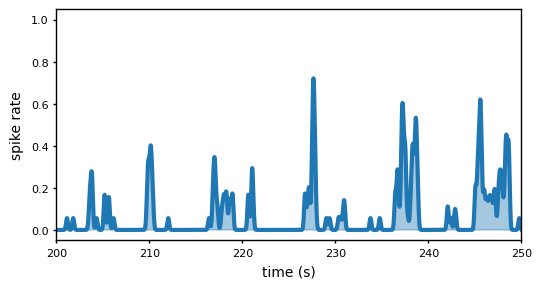

In [9]:
f, ax = plt.subplots(1, 1, figsize=(6, 3))
# This returns positions x, y, time in seconds and spike times
x, y, time_array, spikes = sargolini_data.plot_spike_train(recording_index=4, tetrode_id="T6C1", ax=ax)
ax.set_xlim([200, 250])
plt.show()

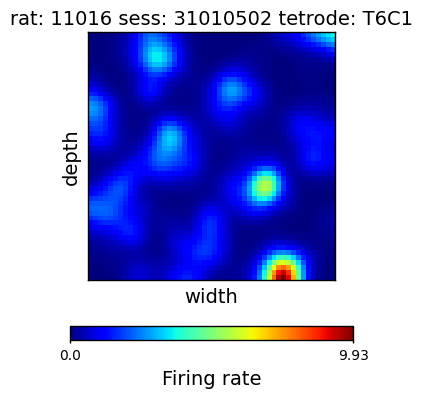

In [10]:
f, ax = plt.subplots(1, 1, figsize=(4, 4))
# Average firing rate for different places in the 2D arena
rate_map, x_bin, y_bin = sargolini_data.plot_recording_tetr(ax=ax, recording_index=4, tetrode_id="T6C1")
plt.show()

### Now you have access to all neurons in the dataset!

<span style="color:red">**Do we want to give them an exercise? For example, extracting other spikes and rate maps?**</span>

If you want to explore additional datasets and features of the `Experiment` class,  
please check out [our notebook with more examples](https://github.com/SainsburyWellcomeCentre/NeuralPlayground/blob/main/examples/experimental_examples/experimental_data_examples.ipynb).


### Creating an environment to train each model

- Before training the models used in this hackathon, we will first create an environment.  

- This package allows you to:  
  - Import **pre-made environments** with the correct dimensions, similar to the experiment.  
  - Automatically load the **behavioral data**, giving access to the animal’s behavior, which can later be used to train the agent. For that you can set `use_behavioral_data=True`  
  - Use the **default policy** of each agent, which imitates naturalistic behavior, `use_behavioral_data=False`

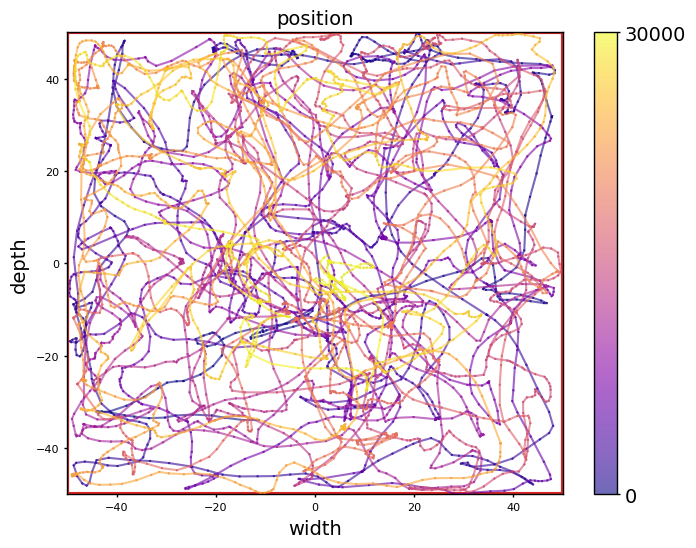

In [11]:
from neuralplayground.arenas import Sargolini2006

env_name = "Sargolini2006"
time_step_size = 0.1 #seg
agent_step_size = 5

env = Sargolini2006(environment_name = env_name,
                    time_step_size = time_step_size,
                    agent_step_size = agent_step_size,
                    use_behavioral_data = True)

env.plot_recorded_trajectory(recording_index=3, plot_every=5)

# We can set this trajectory to be used by the agent by setting 
env.set_animal_data(recording_index=3)

## 3. Training agents

- We now move on to training the agents.  

- Our goal is to compare the **grid-cell representations** of two models against experimental data:  
  - **Successor Representation (SR) model** from [Stachenfeld et al., 2017](https://www.nature.com/articles/nn.4650).  
  - **Excitatory/Inhibitory Plasticity model** from [Weber & Sprekeler, 2018](https://elifesciences.org/articles/34560).  

- Both models provide theoretical mechanisms for the emergence of grid cells:  
  - The SR model explains grid cells as eigenvectors of the successor representation matrix.  
  - The plasticity model explains them as the result of the balance between excitatory and inhibitory plasticity.  

- We will train these models using **animal trajectory data** and then compare the **emergent grid-cell representations** to neural recordings.  


## Summary of the Successor Representation (SR), [Stachenfeld et al. 2017](https://www.nature.com/articles/nn.4650)

- **Successor Representation (SR):**  
  Consider an environment modeled as a Markov chain with transition matrix $T$ under some policy $\pi$.  
  The SR is defined as the expected discounted future occupancy of states:  

  $$
  M(s, s') = \mathbb{E}\left[\sum_{t=0}^\infty \gamma^t \, \mathbb{I}\{s_t = s'\} \mid s_0 = s\right]
  $$

- **Derivation of Matrix Form:**  
  Expanding the expectation over transitions:  

  $$
  M = I + \gamma T + \gamma^2 T^2 + \gamma^3 T^3 + \cdots
  $$

  This is a geometric series in matrices, which converges when $\gamma < 1$:  

  $$
  M = (I - \gamma T)^{-1}
  $$

- **Decomposing Value Function:**  
  Given a reward vector $R$, the value of state $s$ is:  

  $$
  V(s) = \sum_{s'} M(s, s') \, R(s')
  $$

  or in vector form:  

  $$
  V = M R
  $$

- **Eigen-decomposition and Grid Cells:**  
  The SR can be decomposed as:  

  $$
  M = \Phi \Lambda \Phi^{-1}
  $$

  where the eigenvectors in $\Phi$ form spatial basis functions. Many of these exhibit periodic, wave-like structure resembling grid cell firing fields.

- **Interpretation of Eigenvectors:**  
  - **Low-frequency eigenvectors**: capture broad spatial structure (hierarchical planning, subgoals).  
  - **High-frequency eigenvectors**: produce fine, periodic patterns akin to entorhinal grid cells.
    <br>
    
- **Functional Significance:**  
  Grid cells are thus modeled as the **eigenvectors of the SR**, providing a low-dimensional basis for efficient representation, planning, and noise robustness.


In [12]:
from neuralplayground.agents import Stachenfeld2018

agent_step_size = 5
discount = .9
threshold = 1e-6
lr_td = 1e-2
t_episode = 1000
n_episode = 100
state_density = (1 / agent_step_size)
twoDvalue = True

agent = Stachenfeld2018(discount=discount, t_episode=t_episode, n_episode=n_episode, threshold=threshold, lr_td=lr_td,
               room_width=env.room_width, room_depth=env.room_depth, state_density=state_density, twoD=twoDvalue)


## Summary of [Weber & Sprekeler 2018](https://elifesciences.org/articles/34560)

In this work, the authors propose a theoretical model in which **place cells and grid cells** emerge from the interaction of excitatory and inhibitory plasticity. The spatial structure of the output cells depends critically on the relative smoothness of the excitatory and inhibitory tuning functions, $r_i^{E}(x)$ and $r_j^{I}(x)$, where $x$ denotes the animal’s position.


## Output activity

The activity of the output neuron is given by

$$
r^{out}(x(t)) = \Bigg[ \sum_{i=1}^{N_{e}} w_i^{E}(t) \, r_i^{E}(x(t)) \;-\; \sum_{j=1}^{N_{i}} w_j^{I}(t) \, r_j^{I}(x(t)) \Bigg]_{+},
$$

where $N_e$ and $N_i$ are the numbers of excitatory and inhibitory inputs, $w_i^E$ and $w_j^I$ are their synaptic weights, and $[\,\cdot\,]_{+}$ denotes rectification (ReLU nonlinearity).  

For example, a typical input tuning curve can be modeled as a Gaussian:

$$
r_i^P(x) = \alpha_P \exp\!\left(-\frac{(x - \mu_i)^2}{2\sigma_P^2}\right),
$$

with random centers $\mu_i$ and width $\sigma_P$, where $P \in \{E, I\}$.


## Synaptic plasticity rules

Weights evolve according to local Hebbian-like rules:

- **Excitatory synapses:**

$$
\Delta w^{E} = \eta_E \, r^{E}(x) \, r^{out}(x),
$$

which strengthens excitatory weights whenever presynaptic input $r^E(x)$ and output activity $r^{out}(x)$ are co-active.

- **Inhibitory synapses:**

$$
\Delta w^{I} = \eta_I \, r^{I}(x) \, \big(r^{out}(x) - \rho_0\big),
$$

which adjusts inhibition depending on the deviation of the output from a homeostatic target firing rate $\rho_0$.

## Mechanism for grid-cell emergence

The **relative smoothness** of excitatory vs. inhibitory tuning functions determines the emergent spatial patterns:

- If inhibitory inputs are **broader** (smoother) than excitatory ones, the output neuron develops **periodic grid-like firing fields**.  
- If inhibitory inputs are **narrower**, localized **place-cell–like firing** emerges.  
- Balanced smoothness can also generate band-like cells and other spatial invariances.

## Implementation

In simulations, the position $x(t)$ can be sampled either from a random walk in 1D/2D space or from recorded animal trajectories. Using the above equations, the network self-organizes to produce **place cells, grid cells, or band cells**, depending only on the statistics of the excitatory and inhibitory inputs and their relative smoothness.

The primary
 of this hackathon is to explore the **alignment of neural representations**. Specifically, we aim to investigate:

- **When, how and why** it is meaningful to align representations
- The potential **caveats**, such as:
  - Number of recorded cells
  - Neural remapping
  - Variability across experimental conditions

We will adapt methods originally developed for aligning representations in **machine learning** to neuroscience applications, focusing on **grid cell** activity.

The hackathon will use the **Neural Playground** platform as our main tool, but feel free to write your own code along the way, and let us know if you don't like something

<span style="color:red">**Do we want to say something about what alignment means?**</span>


## 🧠 Steps Overview

### 1. Data Acquisition

We will first introduce these representation found int he entoriehnal coretex We will begin by using Neural Playground to access the **Sargolini dataset**, which includes:

- Animal trajectory data
- Corresponding grid cell recordings <span style="color:red">**spike data and a way to compute ratemaps**</span>

### 2. Agent Training

We will build a arena based on the experiemtal imfroamtion and train an artificial agent using the **Stachenfeld successor representation (SR) model**, applying it to the same trajectory as in the experimental data. This will allow us to generate **comparable neural representations**.

### 3. Representation Comparison

To evaluate and compare biological and artificial representations, we will build **Representational Similarity Matrices (RSMs)**. These will help us quantify and visualize the alignment between the two systems.

---

Let us know what you'd like to explore further—whether it’s alignment techniques, specific neural metrics, or alternative agent models!

## 1. Data Acquisition



In [ ]:
import matplotlib.pyplot as plt

from neuralplayground.experiments import Sargolini2006Data

In [ ]:
sargolini_data = Sargolini2006Data(verbose=False)

In [ ]:
dataframe = sargolini_data.show_data(full_dataframe=True)

In [ ]:
help(sargolini_data.get_tetrode_data)

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 4))
x, y, time_array, spikes = sargolini_data.plot_spike_train(recording_index=3, tetrode_id="T5C1", ax=ax)
ax.set_xlim([200, 250])


In [ ]:
rate_map, x_bin, y_bin = sargolini_data.plot_recording_tetr(recording_index=4, tetrode_id="T6C1")

In [ ]:
recoring_tetr_list = sargolini_data.plot_recording_tetr(recording_index=[1])


In [ ]:
# Plot every 5 to make the plot lighter
x, y, time_steps = sargolini_data.plot_trajectory(recording_index=2, 
                                                  plot_every=5)

## Exercice:
Do the thing bellow

In [ ]:
tetrode_ids = ["T5C2", "T6C1", "T6C2", "T6C3", "T8C2"]

# Arrays to store the output
rate_maps = []
x_bins = []
y_bins = []

# Loop over each tetrode ID and extract the data
for tet_id in tetrode_ids:
    rate_map, x_bin, y_bin = sargolini_data.plot_recording_tetr(
        save_path='./trajectory_after_merge_2',
        recording_index=4,
        tetrode_id=tet_id,
        #bin_size=5,
    )
    print("X_mec shape:", rate_map.shape)
    rate_maps.append(rate_map)
    x_bins.append(x_bin)
    y_bins.append(y_bin)

# Stack the flattened rate maps column-wise to form X_mec
#X_mec = np.stack(rate_maps, axis=2)  # Shape: (N_locations, N_mec_cells)
#print("X_mec shape:", X_mec.shape)  # Should be (N_locations, 5)
# Flatten each 2D rate map to a 1D array before stacking
rate_maps_flattened = [rate_map.flatten() for rate_map in rate_maps]

# Stack the flattened maps column-wise
X_mec = np.stack(rate_maps_flattened, axis=1)  # Shape: (2500, 5)

print("X_mec shape:", X_mec.shape)



## 2. Agent Training

### 🛠️ Virtual Arena from Experimental Data

The package includes tools for constructing flexible 2D environments with arbitrary geometries defined by "walls". These arenas can be easily adapted for different experimental setups.

We use metadata from real experiments to generate **virtual arenas** that accurately reflect the spatial structure and constraints of the original behavioral environments. This setup enables direct comparison between neural data and simulated agent activity.

This implementation includes simulations in environments modeled after the **Sargolini et al.** experiment, providing a practical way to test the SR model’s predictions in biologically realistic settings.

### 🧠 Running the Successor Representation (SR) Model

This module demonstrates how to train and evaluate an agent using the **Successor Representation (SR)** model, as described in:

**Kimberly L. Stachenfeld, Matthew M. Botvinick, & Samuel J. Gershman**
[*The hippocampus as a predictive map*, Nature Neuroscience (2017)](https://www.nature.com/articles/nn.4650)


The SR model proposes that the hippocampus encodes a predictive map of future states based on current location and transition dynamics.
Rather than representing space directly, the model encodes the expected future occupancy of states under a given policy. This allows for flexible, predictive spatial representations that support navigation and learning.

![Screenshot%202022-03-25%20at%2016.35.54.png](attachment:Screenshot%202022-03-25%20at%2016.35.54.png)




In [ ]:
from IPython.display import HTML, display

display(HTML("<style>.container { width:80% !important; }</style>"))

## Arenas with experimental data

These arenas are pre-configured to follow the dimensions and sampling rate of a real experiment. When initializing these arenas, the recorded data from the corresponding experiment will be automatically loaded using the Experimental Data Class (see [these examples](https://github.com/ClementineDomine/NeuralPlayground/blob/main/examples/experimental_examples/experimental_data_examples.ipynb)). The idea is to create artificial environment with a structure that resembles the experiment, to then compare with experimental recordings. For now, these classes are

In [ ]:
from neuralplayground.arenas import Sargolini2006

In [ ]:
env_name = "Sargolini2006"
time_step_size = 0.1 #seg
agent_step_size = 5

env = Sargolini2006(environment_name = env_name,
                    time_step_size = time_step_size,
                    agent_step_size = agent_step_size,
                    use_behavioral_data = True)

Some of the methods from the Experiment class are included in these specific arena classes, these methods are ```show_data()```, ```set_animal_data()```, ```plot_recording_tetr()```, ```plot_recorded_trajectory()```. These methods works analogous to the ones available in the [Experiment classes](https://github.com/ClementineDomine/NeuralPlayground/blob/main/examples/experimental_examples/experimental_data_examples.ipynb)

In [ ]:
recording_list = env.show_data()  # env.data has an object of the experiment class with Sargolini et al data

In [ ]:
env.plot_recorded_trajectory(recording_index=3, plot_every=5)


You can set which recording behavior you want to use by using ```set_animal_data()``` methods as you would do with an experimental class


In [ ]:
env.set_animal_data(recording_index=3)

### 🤖 Agent-Environment Interaction

The arenas are designed to support interaction with an agent using a similar method to the **OpenAI Gym** interface. The agent receives an observation, updates its representation and returns an action, which the environment uses to update its internal state.



In [ ]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from neuralplayground.agents import Stachenfeld2018


In [ ]:
agent_step_size = 5
discount = .9
threshold = 1e-6
lr_td = 1e-2
t_episode = 1000
n_episode = 100
state_density = (1 / agent_step_size)
twoDvalue = True

agent = Stachenfeld2018(discount=discount, t_episode=t_episode, n_episode=n_episode, threshold=threshold, lr_td=lr_td,
               room_width=env.room_width, room_depth=env.room_depth, state_density=state_density, twoD=twoDvalue)




## Eigenvector Selection and Projection

Here, we select a subset of grid cells and choose **5 eigenvectors** corresponding to the following eigenvalue indices:
**1, 10, 15, 20, and 25**.

We gather these cells into an array resulting in a matrix of shape: `(N_locations, N_eigvecs)`,

---
### Additional exercies:
For further analysis and comparison, you can modify the set of eigenvalues used and observe how this affects the resulting scores, or which eigenvector you choose.



In [ ]:
sr = agent.update_successor_rep_td_full(n_episode=100, t_episode=100) # One can compute the successor representation using successive additive update
agent.plot_rate_map(agent.srmat_full_td, eigen_vectors=[1,10,15,20,25],save_path=None)
agent.plot_rate_map(sr, eigen_vectors=[1,10,15,20,25],save_path=None)

sr_sum = agent.successor_rep_sum() # One can compute the successor representation matrix using geometric sums for $\gamma<1$
agent.plot_rate_map(agent.srmat_sum, eigen_vectors=[1,10,15,20,25],save_path=None)
agent.plot_rate_map(sr_sum, eigen_vectors=[1,10,15,20,25],save_path=None)


srmat_ground=agent.successor_rep_solution()
agent.plot_rate_map(agent.srmat_ground, eigen_vectors=[1,10,15,20,25],save_path=None)
agent.plot_rate_map(srmat_ground, eigen_vectors=10,save_path ='./grids_sr_2')

In [ ]:
plot_every = 100000
total_iters = 0
obs, state = env.reset()
for i in tqdm(range(100000)):
# Observe to choose an action
    action = agent.act(obs[:2])  # the action is link to density of state to make sure we always land in a new
    agent.update()
    obs, state, reward = env.step(action)
    obs= obs[:2]
    total_iters += 1
    if total_iters % plot_every == 0:
        agent.plot_rate_map(sr_matrix=agent.srmat,eigen_vectors=[1,10,15,20], save_path='./sr_Sargo.png')


In [ ]:
# ax = env.plot_trajectory()
# ax.grid()
# # ax.legend(fontsize=fontsize, loc="upper left")
# ax.set_xlabel("width", fontsize=16)
# ax.set_ylabel("depth", fontsize=16)
# plt.savefig("sargolini.pdf", bbox_inches="tight")
# plt.show()

Exercice: Do the thing bellow

In [ ]:
# Plot every 5 to make the plot lighter
eigen_ids = [11,10,15,20,12]

# Arrays to store the output
rate_maps = []
x_bins = []
y_bins = []

# Loop over each tetrode ID and extract the data
for eigen_id in eigen_ids:
    rate_map = agent.get_rate_map_matrix(sr_matrix=agent.srmat_ground,eigen_vector=eigen_id)
    rate_maps.append(rate_map)
    print("X_sr shape:", rate_map.shape)
    x_bins.append(x_bin)
    y_bins.append(y_bin)

rate_maps_flattened = [rate_map.flatten() for rate_map in rate_maps]

# Stack the flattened rate maps column-wise to form X_sr
X_sr = np.stack(rate_maps_flattened, axis=1)  # Shape: (N_locations, N_mec_cells)

print("X_sr shape:", X_sr.shape)  # Should be (N_locations, 5)

### 3. Representation Comparison

### 🧠 What Neuroscientists Do in Practice

- **Compare statistical properties**, not direct alignments.
  - Grid score distributions
  - Field spacing
  - Orientation distributions
  - *Example*: “Do the model’s firing fields have similar spacing to real MEC data?”

- **Look at population-level decoding or geometry**
  - Latent space analysis (e.g., **toroidal topology** — *Gardner et al., 2022*)
  - Use manifold learning to compare qualitative structure

- **Qualitatively compare maps**
  - Visual inspection of rate maps and autocorrelograms
  - ❌ *But not actual 1:1 spatial alignments*


We have gathered the data and structured it in the following format:

```python
# X_mec: (N_locations, N_mec_cells)
# X_sr:  (N_locations, N_sr_features)
```

They are the same size now so it should be perfect to do the analysis




In [ ]:
print("X_mec shape:", X_mec.shape)
print("X_mec shape:", X_sr.shape)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import orthogonal_procrustes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- Load your data here ---
# X_mec and X_sr must be (N_locations, N_features)
# X_mec: real MEC data; X_sr: model representations (e.g., SR eigenvectors)

# --- Step 1: Preprocess (center & scale) ---
scaler_mec = StandardScaler()
X_mec_pre = scaler_mec.fit_transform(X_mec)

scaler_sr = StandardScaler()
X_sr_pre = scaler_sr.fit_transform(X_sr)

# --- Step 2: Procrustes Alignment (FIXED: removed extra scaling) ---
R, _ = orthogonal_procrustes(X_sr_pre, X_mec_pre)
X_sr_aligned = X_sr_pre @ R

# --- Step 3: Quantitative Metrics ---
def avg_cosine_sim(X1, X2):
    sims = [np.dot(X1[i], X2[i]) /
            (np.linalg.norm(X1[i]) * np.linalg.norm(X2[i]))
            for i in range(len(X1))]
    return np.nanmean(sims)

d_aligned = np.linalg.norm(X_mec_pre - X_sr_aligned, 'fro')
d_unaligned = np.linalg.norm(X_mec_pre - X_sr_pre, 'fro')
cos_sim_aligned = avg_cosine_sim(X_mec_pre, X_sr_aligned)
cos_sim_unaligned = avg_cosine_sim(X_mec_pre, X_sr_pre)

print(f"Procrustes Distance (Aligned):   {d_aligned:.4f}")
print(f"Procrustes Distance (Unaligned): {d_unaligned:.4f}")
print(f"Avg Cosine Similarity (Aligned):   {cos_sim_aligned:.4f}")
print(f"Avg Cosine Similarity (Unaligned): {cos_sim_unaligned:.4f}")

# --- Step 4: PCA-Based Visualization ---
pca = PCA(n_components=2)
pca_all = pca.fit(np.vstack([X_mec_pre, X_sr_pre, X_sr_aligned]))

X_mec_2d = pca_all.transform(X_mec_pre)
X_sr_2d = pca_all.transform(X_sr_pre)
X_sr_aligned_2d = pca_all.transform(X_sr_aligned)

spatial_color = np.linspace(0, 1, X_mec.shape[0])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Before alignment
axes[0].scatter(*X_mec_2d.T, c=spatial_color, cmap='viridis', s=10, label='MEC')
axes[0].scatter(*X_sr_2d.T, c=spatial_color, cmap='plasma', s=10, alpha=0.6, label='SR (Original)')
axes[0].set_title('Before Alignment (PCA)')
axes[0].legend()

# After alignment
axes[1].scatter(*X_mec_2d.T, c=spatial_color, cmap='viridis', s=10, label='MEC')
axes[1].scatter(*X_sr_aligned_2d.T, c=spatial_color, cmap='plasma', s=10, alpha=0.6, label='SR (Aligned)')
axes[1].set_title('After Alignment (PCA)')
axes[1].legend()

plt.tight_layout()
plt.show()

# --- Step 5: Random Baseline (Shuffle Test, FIXED) ---
n_shuffles = 100
shuffle_distances = []
shuffle_cosines = []

for i in range(n_shuffles):
    X_sr_shuffled = np.random.permutation(X_sr_pre)
    R_rand, _ = orthogonal_procrustes(X_sr_shuffled, X_mec_pre)
    X_sr_shuf_aligned = X_sr_shuffled @ R_rand

    d_rand = np.linalg.norm(X_mec_pre - X_sr_shuf_aligned, 'fro')
    cos_rand = avg_cosine_sim(X_mec_pre, X_sr_shuf_aligned)

    shuffle_distances.append(d_rand)
    shuffle_cosines.append(cos_rand)

# Plot the null distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(shuffle_distances, bins=20, color='gray', alpha=0.7)
axes[0].axvline(d_aligned, color='red', linestyle='--', label='Actual')
axes[0].set_title('Procrustes Distance (Null vs. Observed)')
axes[0].legend()

axes[1].hist(shuffle_cosines, bins=20, color='gray', alpha=0.7)
axes[1].axvline(cos_sim_aligned, color='red', linestyle='--', label='Actual')
axes[1].set_title('Cosine Similarity (Null vs. Observed)')
axes[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
from scipy.linalg import orthogonal_procrustes
from sklearn.preprocessing import StandardScaler


In [ ]:
# --- Step 1: Preprocessing (Centering and Scaling) ---
# It's good practice to center and scale the data before Procrustes for consistency.
# This ensures that differences in mean activity or overall scale don't dominate the alignment.
scaler_mec = StandardScaler()
X_mec_preprocessed = scaler_mec.fit_transform(X_mec)

scaler_sr = StandardScaler()
X_sr_preprocessed = scaler_sr.fit_transform(X_sr)

In [ ]:
# --- Step 2: Perform Procrustes Alignment ---
# orthogonal_procrustes(A, B) finds the optimal rotation R and scaling factor `scale`
# such that A @ R * scale is as close as possible to B.
# Here, we want to align SR to MEC, so SR is 'A' and MEC is 'B'.
R, scale = orthogonal_procrustes(X_sr_preprocessed, X_mec_preprocessed)

# Apply the transformation to the SR data
X_sr_aligned = np.dot(X_sr_preprocessed, R)


In [ ]:
# --- Step 3: Calculate Quantitative Metrics ---
# Procrustes Distance (Frobenius norm of the difference)
procrustes_distance = np.linalg.norm(X_mec_preprocessed - X_sr_aligned, 'fro')
print(f"Procrustes Distance after alignment: {procrustes_distance:.4f}")

# Calculate distance *before* alignment for comparison
procrustes_distance_unaligned = np.linalg.norm(X_mec_preprocessed - X_sr_preprocessed, 'fro')
print(f"Procrustes Distance before alignment: {procrustes_distance_unaligned:.4f}")

# Average Cosine Similarity (aligned)
cosine_sim_per_location = [np.dot(X_mec_preprocessed[i], X_sr_aligned[i]) /
                           (np.linalg.norm(X_mec_preprocessed[i]) * np.linalg.norm(X_sr_aligned[i]))
                           for i in range(X_mec_preprocessed.shape[0])]
average_cosine_similarity = np.nanmean(cosine_sim_per_location) # Use nanmean to handle potential division by zero if a row is all zeros
print(f"Average Cosine Similarity (aligned): {average_cosine_similarity:.4f}")

# Average Cosine Similarity (unaligned)
cosine_sim_per_location_unaligned = [np.dot(X_mec_preprocessed[i], X_sr_preprocessed[i]) /
                                     (np.linalg.norm(X_mec_preprocessed[i]) * np.linalg.norm(X_sr_preprocessed[i]))
                                     for i in range(X_mec_preprocessed.shape[0])]
average_cosine_similarity_unaligned = np.nanmean(cosine_sim_per_location_unaligned)
print(f"Average Cosine Similarity (unaligned): {average_cosine_similarity_unaligned:.4f}")



In [ ]:
# --- Step 4: Visualization (using the first 2 or 3 dimensions) ---
# Even though you have 10 dimensions, you'll still visualize in 2D or 3D for clarity.
# You can either use the first 2/3 of the 10 dimensions directly, or run PCA on the 10 dimensions
# for visualization purposes if you want to find the directions of maximal variance within those 10.
# For simplicity, let's just plot the first two dimensions of the preprocessed data.

# Assuming you have `locations` array (N_locations, 2) for coloring
# Let's use the x-coordinate of the location for coloring as an example.
# Replace with your actual spatial variable for coloring.
# For demonstration, let's create a dummy spatial_variable_for_color
N_locations = X_mec.shape[0]
spatial_variable_for_color = np.linspace(0, 1, N_locations) # Example: just a gradient

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Before alignment
axes[0].scatter(X_mec_preprocessed[:, 0], X_mec_preprocessed[:, 1], c=spatial_variable_for_color, cmap='viridis', s=10, label='MEC')
axes[0].scatter(X_sr_preprocessed[:, 0], X_sr_preprocessed[:, 1], c=spatial_variable_for_color, cmap='plasma', s=10, alpha=0.5, label='SR (Original)')
axes[0].set_title('Before Procrustes Alignment (First 2 Features)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()

# After alignment
axes[1].scatter(X_mec_preprocessed[:, 0], X_mec_preprocessed[:, 1], c=spatial_variable_for_color, cmap='viridis', s=10, label='MEC')
axes[1].scatter(X_sr_aligned[:, 0], X_sr_aligned[:, 1], c=spatial_variable_for_color, cmap='plasma', s=10, alpha=0.5, label='SR (Aligned)')
axes[1].set_title('After Procrustes Alignment (First 2 Features)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:

# --- Step 5: Random Baselines (as discussed previously) ---
# This step is still crucial to determine if your alignment is statistically significant.
# The code for this remains the same as provided in the detailed plan.

## What is Procrustes Alignment
Procrustes alignment is a method from shape analysis. Given two sets of points in a high-dimensional space (e.g., neural responses to different stimuli vs. model units), it finds the **best linear transformation** (rotation, reflection, scaling, translation) that minimizes the distance between corresponding points.

Formally, given matrices $X$ (neural responses) and $Y$ (model responses), Procrustes finds $(R, s, t)$ such that:


$$\min_{R, s, t} \; \| X - (s YR + t) \|$$

where:
- $R$ is a rotation/reflection,
- $s$ is a scaling factor,
- $t$ is a translation.